### Load and prepare dataset

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import time
import seaborn as sns
import pandas as pd
import xgboost as xgb
from preprocess import sectioning
from feature_extraction import convert_to_feature_vec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sys.path.append('../')
from load_images import load

In [3]:
img_size = (512, 512)
X, y, masks = load(img_size)

In [4]:
n = 5
num_img = 3
sections, targets = sectioning(X, y, num_img, img_size, n)

In [5]:
section_features = convert_to_feature_vec(sections)
X_train, X_test, y_train, y_test = train_test_split(section_features, targets, test_size=0.2, shuffle=True)

### Train classifiers

In [6]:
f1_scores = {}
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### K-Nearest Neigbors


In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
f1_scores['knn'] = f1_score(y_test, knn.predict(X_test))

#### Logistic Regression


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
f1_scores['logreg'] = f1_score(y_test, logreg.predict(X_test))

#### Naive Bayes


In [13]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
f1_scores['bayes'] = f1_score(y_test, bayes.predict(X_test))

#### AdaBoost


In [14]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
f1_scores['ada'] =  f1_score(y_test, ada.predict(X_test))

#### Gradient Boosting


In [15]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
f1_scores['gbc'] = f1_score(y_test, gbc.predict(X_test))

#### Random Forest

In [16]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
f1_scores['forest'] = f1_score(y_test, forest_clf.predict(X_test))

#### XGBoost

In [22]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
f1_scores['xgb'] = f1_score(y_test, xgb_clf.predict(X_test))

### Results

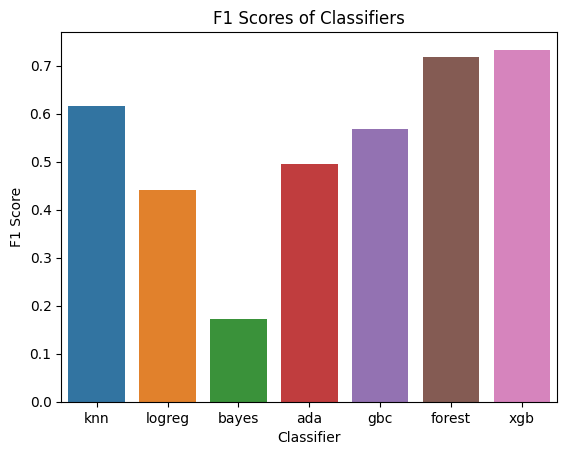

In [23]:
df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'Classifier'}, inplace=True)
sns.barplot(data=df, x='Classifier', y='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Classifiers')
plt.show()

Based on few tests it looks like XGBoost outperforms other classifiers.